This exercise is inspired by <a href='https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b'>this</a> tutorial.

# Getting Started

Nowadays, most datasets have a large number of variables (or features), which creates a problem for most machine learning algorithms since many variables would "drown" the significant features by introducing "noise" and thus diminishing the effectiveness of ML algorithms. Another problem with high-dimensional data is that manual feature engineering becomes impractical as the number of dimensions gets larger.

To deal with problems of high-dimensional data, I can use dimensionality reduction techniques, such as the famous PCA and t-SNE.

I will be using MNIST dataset for this exercise. Lets begin:

In [1]:
#Import dataset
import numpy as np
from sklearn.datasets import fetch_mldata
#from tensorflow.examples.tutorials.mnist import input_data

mnist = fetch_mldata('MNIST original')
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
#Converting to Pandas dataframe for easier plotting
import pandas as pd

feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]

df = pd.DataFrame(X, columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


The dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). Therefore, I will randomise the data with the following, and plot my data to see what it looks like:

In [4]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

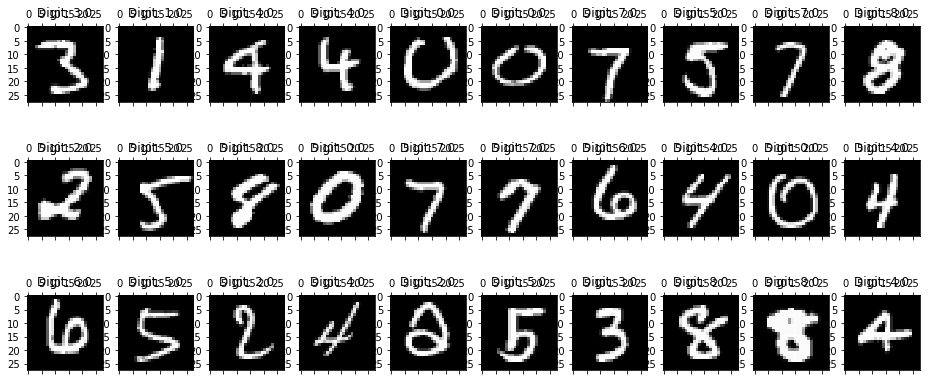

In [23]:
#generate 30 plots of randomly selected images
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(16, 7))

#30 plots, with 3 rows and 10 columns
for i in range(0, 30):
    ax = fig.add_subplot(3, 10, i+1, title='Digit: ' + str(df.loc[rndperm[i], 'label']))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28, 28)).astype(float))
    
plt.show()

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original dataset is distributed, and it does ths using eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of the variations in the data. These are the directions of maximum variation in a dataset. For the detailed explanation of eigenvalues and eigenvectors, see <a href='https://www.math.hmc.edu/calculus/tutorials/eigenstuff/'>this</a> page, or watch <a href='https://www.youtube.com/watch?v=PFDu9oVAE-g'>this</a> great Youtube video.

First, I start by generating the first three principal components out of 784 dimensions. Then I look at how much of the variation in the total dataset they actually account for.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2]

print('Expalined variation per principal component: {}'.format(pca.explained_variance_ratio_))

Expalined variation per principal component: [0.09746116 0.07155445 0.06149531]


I can see that the first two components account for about 17% of the variation in the entire dataset. Next, I will try to see if that is enough to visually set the different digits apart.

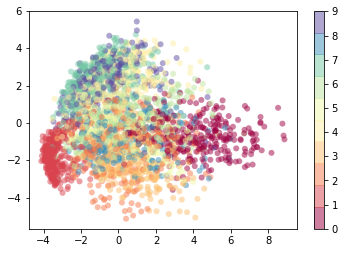

In [26]:
'''import ggplot

chart = ggplot(df.loc[rndperm[:3000], :], aes(x='pca-one', y='pca-two', color='label'))\
            + geom_point(size=75, alpha=0.8)\
            + ggtitle('First and Second Principal Components colors by digit')
chart'''

import matplotlib.pyplot as plt

df2 = df.loc[rndperm[:3000],:]

plt.scatter(df2['pca-one'], df2['pca-two'], edgecolor='none', alpha=0.5, c=df2.label,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()

From the graph, I can see that the two components definitely hold some information, but not enough to set them all apart.

Next, I can use t-SNE to see if it gives better results:

# t-Distributed Stochastic Neighboring Entities (t-SNE)

Contrary to PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is not a mathematical technique, but a probablistic one. The <a href='http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf'>original paper</a> describes the working of t-SNE as:

<i>“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.</i>

Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. I can read more about the t-SNE from its website <a href='https://lvdmaaten.github.io/tsne/'>here</a>.

I will first try to run the algorithm on the actual dimensions of the data (784) and see how it works. To not burden my machine, I will use the first 7,000 samples to run the algorithm on.

In [28]:
#use the scikit-learn implementation of the algorithm
import time
from sklearn.manifold import TSNE

In [29]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:7000], feat_cols].values)

print('t_SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.581s...
[t-SNE] Computed neighbors for 7000 samples in 51.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.235297
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.086372
[t-SNE] Error after 300 iterations: 2.424419
t_SNE done! Time elapsed: 138.00063228607178 seconds


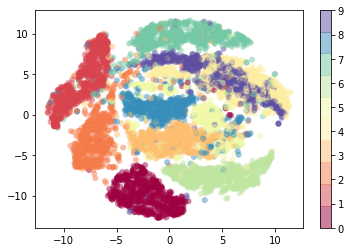

In [30]:
#Visualizing
df_tsne = df.loc[rndperm[:7000],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.scatter(df_tsne['x-tsne'], df_tsne['y-tsne'], edgecolor='none', alpha=0.5, c=df_tsne.label,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()

# First PCA, then t-SNE

Following the recommendation from the original paper, I will now actually reduce the number of dimensions before feeding the data into the t-SNE algorithm. For this I'll use PCA again. I'll first create a new dataset containing the fifty dimensions generated by the PCA reduction algorithm. I can then use this dataset to perform the t-SNE on:

In [32]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

print('Cumulative explained variation for 50 principal components: {}'\
         .format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8253718770992766


Now I try and feed this data into the t-SNE algorithm. This time I’ll use 10,000 samples out of the 70,000 to make sure the algorithm does not take up too much memory and CPU.

In [36]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:10000]])

print('t_SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 10.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.853230
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.227013
[t-SNE] Error after 300 iterations: 2.772690
t_SNE done! Time elapsed: 121.91

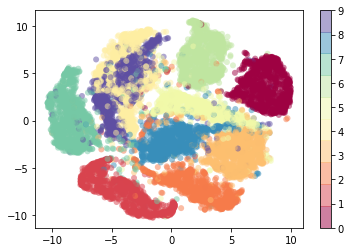

In [37]:
#Visualizing
df_tsne = None
df_tsne = df.loc[rndperm[:10000],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

plt.scatter(df_tsne['x-tsne-pca'], df_tsne['y-tsne-pca'], edgecolor='none', alpha=0.5, c=df_tsne.label,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()

From this plot, I can clearly see how all the samples are nicely spaced apart and grouped together with their respective digits. This could be an amazing starting point to then use a clustering algorithm and try to identify the clusters or to actually use these two dimensions as input to another algorithm (e.g., something like a Neural Network).